In [118]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook", font_scale=1.3)
import numpy as np
import pandas as pd
import PhaseRetrieval
import simple_gaussian_data_generator
from skimage import data
from skimage import color, img_as_float
from skimage.feature import register_translation
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
# camera = img_as_float(color.rgb2gray(data.camera()))
# mags = np.abs(np.fft.fftn(camera))
# chio = PhaseRetrieval.PhaseRetrieval(mags)
# chio.CHIO(n_iter=5000, prog_bar=True)
# plt.imshow(chio.real_space_guess)

In [107]:
# guess1 = simple_gaussian_data_generator.normalize_imrage(simple_gaussian_data_generator.simple_gaussians(100, 10))

[====================] 1000/1000 steps  

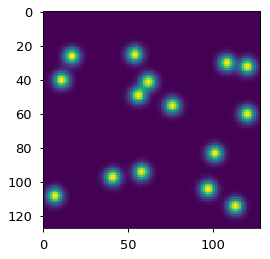

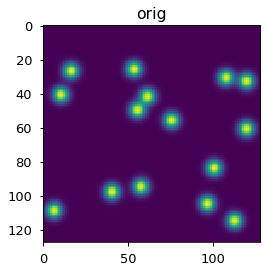

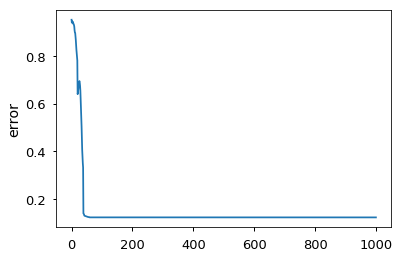

In [140]:
img = simple_gaussian_data_generator.normalize_image(simple_gaussian_data_generator.simple_gaussians(15, 10))
mags = np.abs(np.fft.fftn(img))
chio = PhaseRetrieval.PhaseRetrieval(mags)
chio.CHIO(n_iter=1000, prog_bar=True)
chio.calc_real_space_error(img)

In [111]:
# def align(img, ref):
#     errs = np.zeros(4)
#     for i in range(4):
#         shift, errs[i], blarg = register_translation(ref, np.rot90(img, k=i))
#     n_rot = np.argmin(errs)
#     shift, error, blargh= register_translation(ref,np.rot90(img, k=n_rot))
#     fixed = np.roll(np.rot90(img, k=n_rot),shift.astype(np.int),axis=(0,1))
#     return fixed
# try:
#     os.mkdir("movie2")
# except:
#     print "Already made"
# for i in range(201):
#     plt.figure(figsize=(8, 8))
#     plt.title("CHIO -- Iteration: %d" %i)
#     plt.imshow(align(chio.rs_track[i], img), cmap="gray_r")
#     plt.savefig("movie2/img%04d.png" %i)
#     plt.close()

Already made


In [80]:
# %%bash
# ffmpeg -i movie2/img%04d.png -vcodec libx264 -pix_fmt yuv420p movie_shiftingGaussians2.mp4

ffmpeg version 3.4.1 Copyright (c) 2000-2017 the FFmpeg developers
  built with Apple LLVM version 9.0.0 (clang-900.0.39.2)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/3.4.1 --enable-shared --enable-pthreads --enable-version3 --enable-hardcoded-tables --enable-avresample --cc=clang --host-cflags= --host-ldflags= --enable-gpl --enable-libmp3lame --enable-libx264 --enable-libxvid --enable-opencl --enable-videotoolbox --disable-lzma
  libavutil      55. 78.100 / 55. 78.100
  libavcodec     57.107.100 / 57.107.100
  libavformat    57. 83.100 / 57. 83.100
  libavdevice    57. 10.100 / 57. 10.100
  libavfilter     6.107.100 /  6.107.100
  libavresample   3.  7.  0 /  3.  7.  0
  libswscale      4.  8.100 /  4.  8.100
  libswresample   2.  9.100 /  2.  9.100
  libpostproc    54.  7.100 / 54.  7.100
Input #0, image2, from 'movie2/img%04d.png':
  Duration: 00:00:08.04, start: 0.000000, bitrate: N/A
    Stream #0:0: Video: png, rgba(pc), 576x576 [SAR 2834:2834 DAR 1:1], 25 fps, 25 tbr, 25

In [137]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
def PR_movie(pr, x):
    plt.title("Iteration: %d" %x)
    plt.imshow(pr.rs_track[x], cmap="gray_r")
    return

In [141]:
x = interact(PR_movie, x=widgets.IntSlider(min=0,max=len(chio.rs_track)-1,step=1,value=0), pr=fixed(chio))

A Jupyter Widget

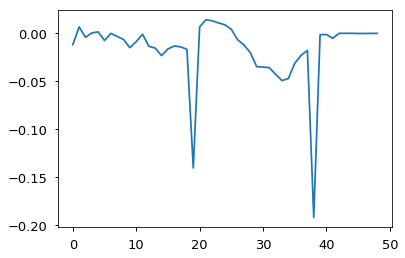

In [145]:
plt.plot(np.diff(chio.real_space_err_track[:50]))

In [148]:
np.where(np.diff(chio.real_space_err_track[:50]) < -0.1)

(array([19, 38]),)

Text(0.5,1,u'Iteration: 20')

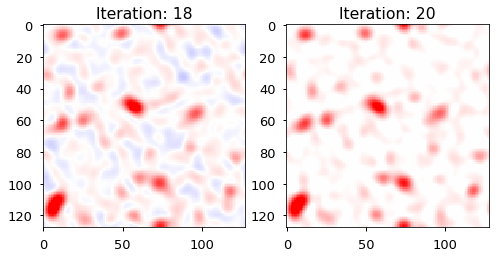

In [157]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(chio.ndm_track[17], cmap="bwr", vmin=-1, vmax=1)
ax[0].set_title("Iteration: 18")
ax[1].imshow(chio.rs_track[20], cmap="bwr", vmin=-1, vmax=1)
ax[1].set_title("Iteration: 20")

Text(0.5,1,u'Iteration: 39')

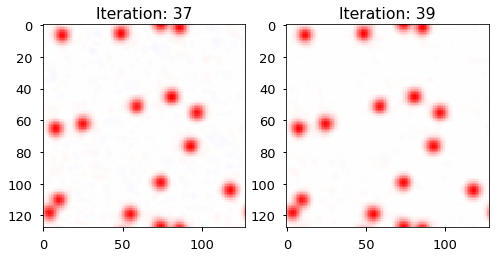

In [158]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(chio.ndm_track[36], cmap="bwr", vmin=-1, vmax=1)
ax[0].set_title("Iteration: 37")
ax[1].imshow(chio.rs_track[39], cmap="bwr", vmin=-1, vmax=1)
ax[1].set_title("Iteration: 39")